In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import csv

from utils import *


<ipython-input-1-e4bcca95ec22>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


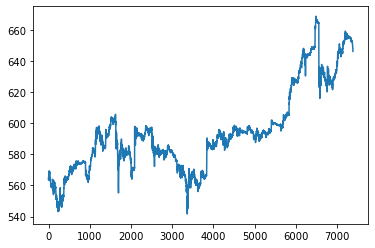

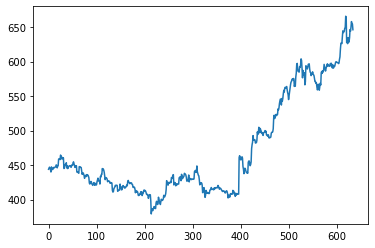

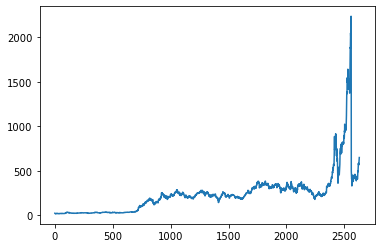

In [2]:
intervals = ['1min', '60min', 'daily']
prediction_horizons = [5, 8, 7]
for interval, prediction_horizon in zip(intervals, prediction_horizons):
    data = download_data(interval)
    X = data['close'].values
    pyplot.plot(X)
    pyplot.show()

/Users/amalota/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test RMSE: 3.031


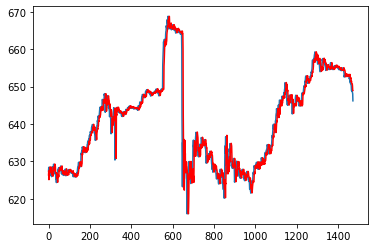

/Users/amalota/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test RMSE: 17.397


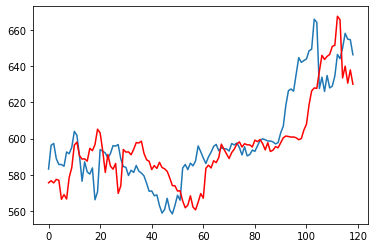

/Users/amalota/anaconda3/envs/py38/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Test RMSE: 240.892


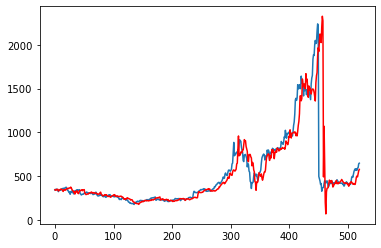

In [5]:
intervals = ['1min', '60min', 'daily']
prediction_horizons = [5, 8, 7]
for interval, prediction_horizon in zip(intervals, prediction_horizons):
    data = download_data(interval)
    X = data['close'].values
    size = int(len(X) * 0.8)
    train, test = X[0:size], X[size:len(X)]
    realValues = [x for x in train]
    predictions = list()
    result = list()
    test_shifted = []

    for t in range(len(test)-prediction_horizon):
        model = ARIMA(realValues, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast(prediction_horizon)
        prediction = output[0][-1]
        predictions.append(prediction)
        expected = test[t+prediction_horizon]
        realValues.append(test[t])
        test_shifted.append(expected)
        result.append
        # print('predicted=%f, expected=%f' % (prediction, expected))


    error = mean_squared_error(test_shifted, predictions, squared=False)
    print('Test RMSE: %.3f' % error)
    # plot

    df = pd.DataFrame(predictions)
    df.to_csv(f'predictions_arima/predictions_{interval}.csv')

    pyplot.plot(test_shifted)
    pyplot.plot(predictions, color='red')
    pyplot.show()